<a href="https://colab.research.google.com/github/danielveloso0/teste/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic - Machine Learning from Disaster (Primeira Submissão)

## Importação e visualização do banco de dados

In [1]:
!pip install kaggle

In [2]:
# Fazendo upload do token da API Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"d4nveloso97","key":"2a26d41ba2ce40728150a42bd4e2e1d4"}'}

In [3]:
# Criando diretório
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [4]:
# Importando os dados da competição
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 30.2MB/s]


In [5]:
# Descompactando os arquivo dos dados da competição
import zipfile
with zipfile.ZipFile('/content/titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [6]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

In [7]:
# Importando os dados de treino e de teste
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (891, 12)
Test shape: (418, 11)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Estatisca do conjunto de dados
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Tipos de Features do dataset
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Verificando valores missing nos dados de treino
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Verificando valores missing nos dados de teste
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Selecionando apenas colunas com valores numeric
train_set= train.select_dtypes(include=['int64','float64'])
test_set= test.select_dtypes(include=['int64','float64'])

In [ ]:
test_set

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500
414,1306,1,39.0,0,0,108.9000
415,1307,3,38.5,0,0,7.2500
416,1308,3,NaN,0,0,8.0500


In [ ]:
# Excluindo os linhas com valores NaN do conjunto de treino
train_set= train_set.dropna()


In [ ]:
test_set.Age

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [ ]:
# Preenchendo os valores missing no conjunto de teste com a média
test_set['Age']=test_set.Age.fillna(test_set.Age.mean())
test_set['Fare']=test_set.Fare.fillna(test_set.Fare.mean())
test_set

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.50000,0,0,7.8292
1,893,3,47.00000,1,0,7.0000
2,894,2,62.00000,0,0,9.6875
3,895,3,27.00000,0,0,8.6625
4,896,3,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500
414,1306,1,39.00000,0,0,108.9000
415,1307,3,38.50000,0,0,7.2500
416,1308,3,30.27259,0,0,8.0500


In [ ]:
test_set.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

##  Exploração do banco de dados

<ipython-input-20-db5f4ba55eb2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_plot, x='Age',y='Survived',palette='deep')


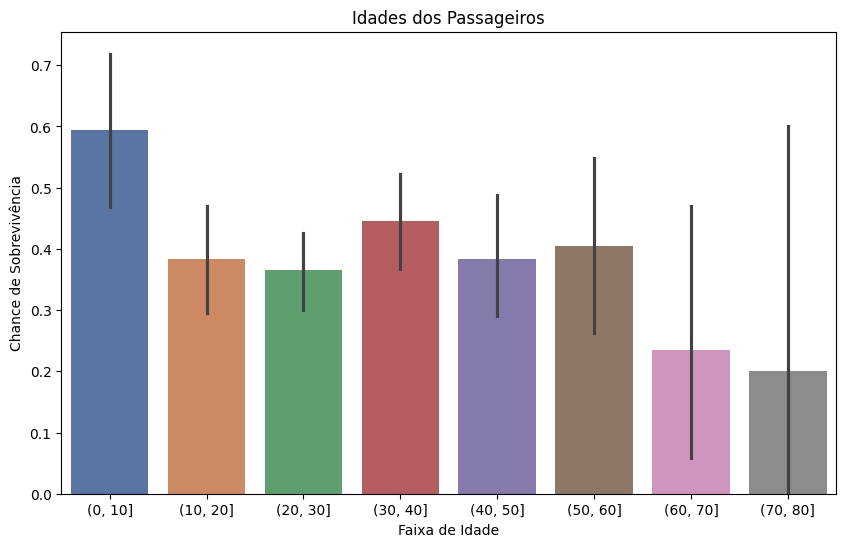

In [ ]:
# Idades dos passageiros
train_plot = train_set.copy()
# Criando as labels com intervalo de idades de 10 anos
labels =np.arange(0,90,10)
# Agrupando as idades em um dataframe
train_plot.Age = pd.cut(train_plot.Age, labels)
# Plotagem
plt.figure(figsize=(10,6))
sns.barplot(data=train_plot, x='Age',y='Survived',palette='deep')
plt.title('Idades dos Passageiros')
plt.xlabel('Faixa de Idade')
plt.ylabel('Chance de Sobrevivência')
plt.show()

Através  dos gráficos é possível notar que o grupo que tem mais chances de sobrevivências são as crianças e o grupo com menor chances são os idosos. Os demais grupos possui chances abaixo de 50 %.

#### Analisando as chances de sobrevivencia devido as demais características

Para essa análise foram utilizados somente features númericas cujo seu valor é discreto,como por exemploclasse econômica a que pertence entre passageiro e parentesco entre passageiros

In [ ]:
train_plot.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Age            category
SibSp             int64
Parch             int64
Fare            float64
dtype: object

In [ ]:
train_plot

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,"(20, 30]",1,0,7.2500
1,2,1,1,"(30, 40]",1,0,71.2833
2,3,1,3,"(20, 30]",0,0,7.9250
3,4,1,1,"(30, 40]",1,0,53.1000
4,5,0,3,"(30, 40]",0,0,8.0500
...,...,...,...,...,...,...,...
885,886,0,3,"(30, 40]",0,5,29.1250
886,887,0,2,"(20, 30]",0,0,13.0000
887,888,1,1,"(10, 20]",0,0,30.0000
889,890,1,1,"(20, 30]",0,0,30.0000


<ipython-input-159-26f080768bbd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_plot, x='Parch',y='Survived',palette='deep')


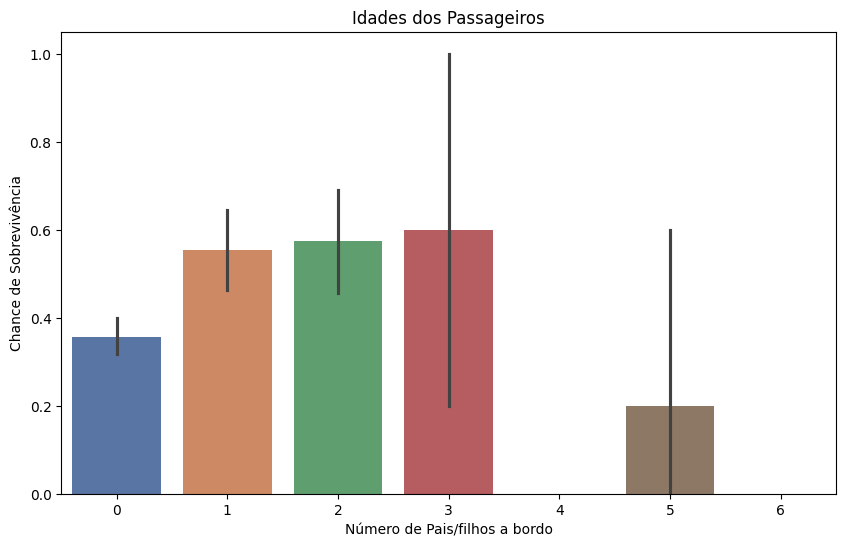

In [ ]:
#Número de Pais/filhos a bordo
plt.figure(figsize=(10,6))
sns.barplot(data=train_plot, x='Parch',y='Survived',palette='deep')
plt.title('Idades dos Passageiros')
plt.xlabel('Número de Pais/filhos a bordo')
plt.ylabel('Chance de Sobrevivência')
plt.show()

**Número de pais/filhos a bordo do Titanic**


In [ ]:
# Quantidades
train_plot.Parch.value_counts()

0    521
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<ipython-input-162-d27effa1f941>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_plot, x='Parch',y='Survived',palette='deep')


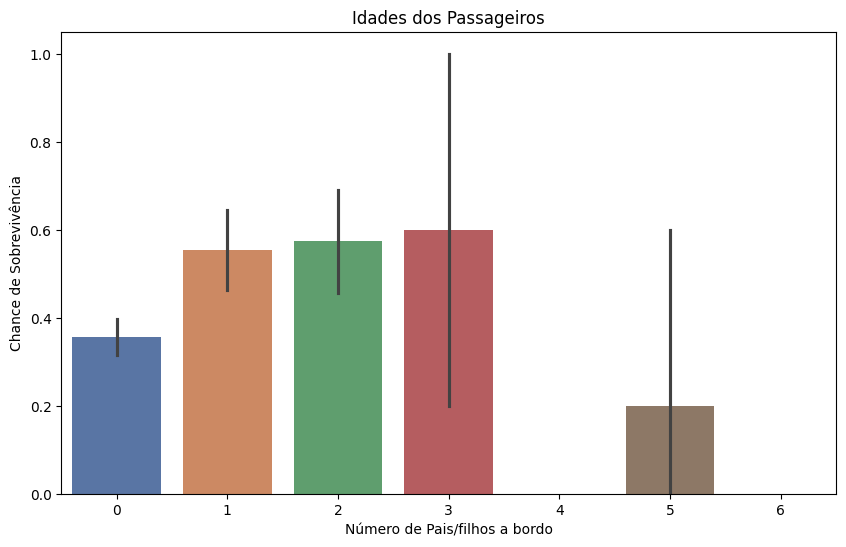

In [ ]:
#Número de Pais/filhos a bordo
plt.figure(figsize=(10,6))
sns.barplot(data=train_plot, x='Parch',y='Survived',palette='deep')
plt.title('Idades dos Passageiros')
plt.xlabel('Número de Pais/filhos a bordo')
plt.ylabel('Chance de Sobrevivência')
plt.show()

A maioria dos registros do dataset são de pessoas com até 3 pais/filhos a bordo. Foi possível observar que passageiros com país ou filhos tem maiores chances de sobrevivência. Apesar de existir poucos passageiro com número maior 3, suas chances de sobrevivencia são baixas.

**Número de Irmãos/Cônjuge a bordo do navio**

In [ ]:
# Quantidades de Registros
train_plot.SibSp.value_counts()

0    471
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

<ipython-input-164-d210c02eb4be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_plot, x='SibSp',y='Survived',palette='deep')


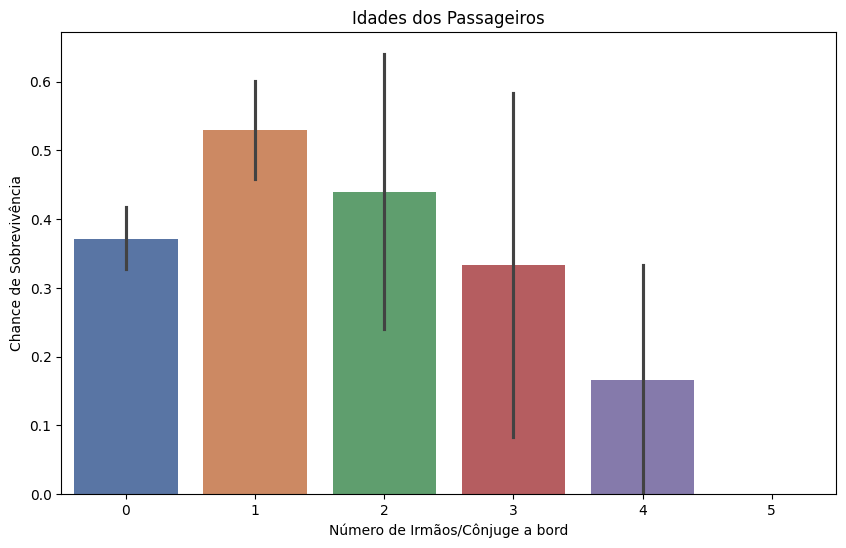

In [ ]:
# Número de Irmãos/Cônjuge a bord
plt.figure(figsize=(10,6))
sns.barplot(data=train_plot, x='SibSp',y='Survived',palette='deep')
plt.title('Idades dos Passageiros')
plt.xlabel('Número de Irmãos/Cônjuge a bord')
plt.ylabel('Chance de Sobrevivência')
plt.show()

A maiores dos passageiros estavam sozinhos, no entanto isso não interferiu tanto na sua chance de sobreviver, apesar de ser menor do quem estava acompanhados.

**Classe Econômica do Passageiro**

In [ ]:
# Quantidades de Registros
train_plot.Pclass.value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

3    355
1    186
2    173
Name: Pclass, dtype: int64

<ipython-input-168-96d16d06da73>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_plot, x='Pclass',y='Survived',palette='deep')


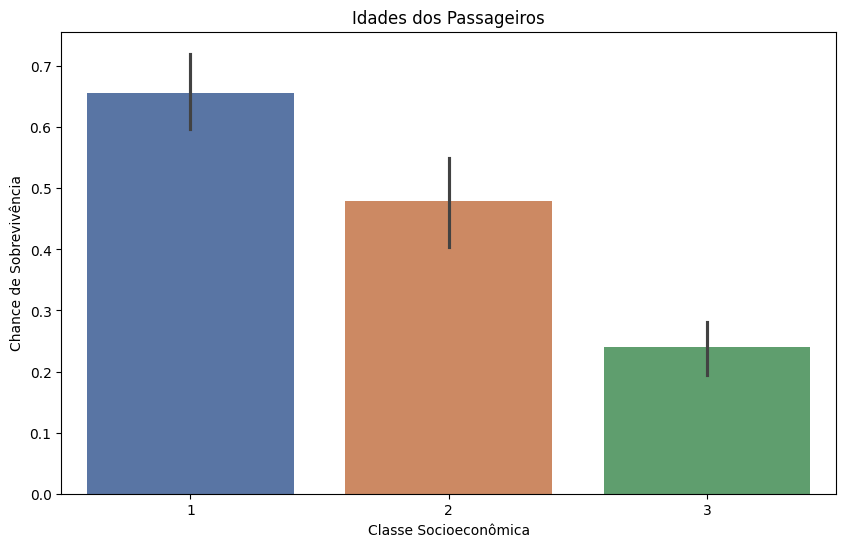

In [ ]:
# Classe socioecnômica do passageiro
plt.figure(figsize=(10,6))
sns.barplot(data=train_plot, x='Pclass',y='Survived',palette='deep')
plt.title('Idades dos Passageiros')
plt.xlabel('Classe Socioeconômica')
plt.ylabel('Chance de Sobrevivência')
plt.show()

Nesse feature é possivel observa uma relação mais clara entre classe do passageiro e sua chance de sobrevivência. Como as quantidades está bem uniformemente destribuídas, nota-se que quanto maior a classe social maior a chance de sobreviver.

#### Conclusão
Através da visualização dos gráficos, foi possível observa uma ligeira relação entre as variáveis e chance de sobrevivência do passageiro. Embora não tenha ficado tão claro, foi possível ter visão geral de quais características influnciaram na sobrevivência do passageiro no desastre do Titanic.

## Treinamento do modelo e submissão das predições

In [ ]:
# Importando as bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# Dividindo o dataset de treino entre labels
X = train_set[['Pclass','Age','SibSp','Parch','Fare']]
y = train_set[['Survived']]
print(X.shape)
print(y.shape)

(714, 5)
(714, 1)


In [ ]:
# Dividindo o banco de dados em treino/val
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=3)
print(f'Train set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_val.shape}, {y_val.shape}')

Train set: (571, 5), (571, 1)
Test set: (143, 5), (143, 1)


In [ ]:
# Definindo e treinando um modelo
np.random.seed(0)
model = RandomForestClassifier(n_estimators= 150, max_depth=9, random_state=1,verbose=3)
model.fit(X_train,y_train)

In [ ]:
# Validação do modelo
y_pred_train= model.predict(X_train)
y_pred_val = model.predict(X_val)
print(f'Acurácia em Treino: {accuracy_score(y_pred_train,y_train)*100:.2f}%')
print(f'Acurácia em Validação: {accuracy_score(y_pred_val,y_val)*100:.2f}%')

Acurácia em Treino: 87.92%
Acurácia em Validação: 73.43%


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s


#### Conclusão
Os parametros do modelo foram definidos como 9 sendo numero máximo de folhas e 150 o número de árvores de decisão contida no modelo. Analisando os resultados da validação do modelo pode se notar que possivelmente houve _overfitting_, devido a diferença entre a acurácia de treino e validação ser consirevalmente grande.

## Gerar predição, salvar a versão e submeter à competição

**Treinando o modelo novamente usando o totalidade do conjunto de treino**

In [ ]:
# Treinando o modelo
np.random.seed(0)
model.fit(X.values,y.values)

In [ ]:
# Acurácia em treino
train_pred = model.predict(X.values)
print(f'Acurácia em Treino: {accuracy_score(train_pred,y.values)*100:.2f}%')

Acurácia em Treino: 86.41%


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:    0.0s


In [ ]:
# Preparando os dados de teste
X_test = test_set.drop(columns=['PassengerId'])
X_test

In [ ]:
gender= pd.read_csv("/content/gender_submission.csv")
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Avaliando o modelo com os dados de teste
test_pred = model.predict(X_test)
test_pred

In [ ]:
# Criando o arquivo para submissão
output = pd.DataFrame({'PassengerId':test_set.PassengerId,'Survived':test_pred})
output.to_csv('submission.csv',index=False)

# Titanic - Machine Learning from Disaster (Segunda Submissão)